In [1]:
import fastai
import pandas as pd
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.data.all import *

In [11]:
import gc
import torch

torch.cuda.empty_cache()
gc.collect()

0

In [12]:
dataset = pd.read_csv('HAM10000_metadata_paths.csv')
dataset.sort_values('image_id')

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_path
4349,HAM_0000550,ISIC_0024306,nv,follow_up,45.0,male,trunk,HAM10000_images_part_1\ISIC_0024306.jpg
4263,HAM_0003577,ISIC_0024307,nv,follow_up,50.0,male,lower extremity,HAM10000_images_part_1\ISIC_0024307.jpg
4217,HAM_0001477,ISIC_0024308,nv,follow_up,55.0,female,trunk,HAM10000_images_part_1\ISIC_0024308.jpg
3587,HAM_0000484,ISIC_0024309,nv,follow_up,40.0,male,trunk,HAM10000_images_part_1\ISIC_0024309.jpg
1451,HAM_0003350,ISIC_0024310,mel,histo,60.0,male,chest,HAM10000_images_part_1\ISIC_0024310.jpg
...,...,...,...,...,...,...,...,...
1721,HAM_0004304,ISIC_0034316,mel,histo,85.0,male,upper extremity,HAM10000_images_part_2\ISIC_0034316.jpg
1888,HAM_0006376,ISIC_0034317,mel,histo,70.0,female,lower extremity,HAM10000_images_part_2\ISIC_0034317.jpg
121,HAM_0000344,ISIC_0034318,bkl,histo,55.0,male,trunk,HAM10000_images_part_2\ISIC_0034318.jpg
7440,HAM_0000747,ISIC_0034319,nv,histo,30.0,male,trunk,HAM10000_images_part_2\ISIC_0034319.jpg


In [13]:
import pandas as pd
import os
from pathlib import Path
from fastai.vision.all import *

dataset = pd.read_csv('HAM10000_metadata_paths.csv')

short_to_full_name_dict = {
    "akiec": "Bowen's disease",
    "bcc": "basal cell carcinoma",
    "bkl": "benign keratosis-like lesions",
    "df": "dermatofibroma",
    "mel": "melanoma",
    "nv": "melanocytic nevi",
    "vasc": "vascular lesions",
}

dataset['image_path'] = dataset['image_path'].apply(lambda x: Path(x).as_posix())
img_to_class_dict = {row['image_path']: short_to_full_name_dict[row['dx']] for index, row in dataset.iterrows()}

def get_label_from_full_path(path):
    standardized_path = Path(path).as_posix()
    try:
        return img_to_class_dict[standardized_path]
    except KeyError:
        print(f"Label not found for file: {standardized_path}")
        return "Unknown"

def get_image_files_from_multiple_dirs(dirs):
    all_files = []
    for dir_path in dirs:
        p = Path(dir_path)
        dir_files = [file.as_posix() for file in p.glob('*.jpg')]
        all_files.extend(dir_files)
    return all_files

img_path = [Path('HAM10000_images_part_1'), Path('HAM10000_images_part_2')]

Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg


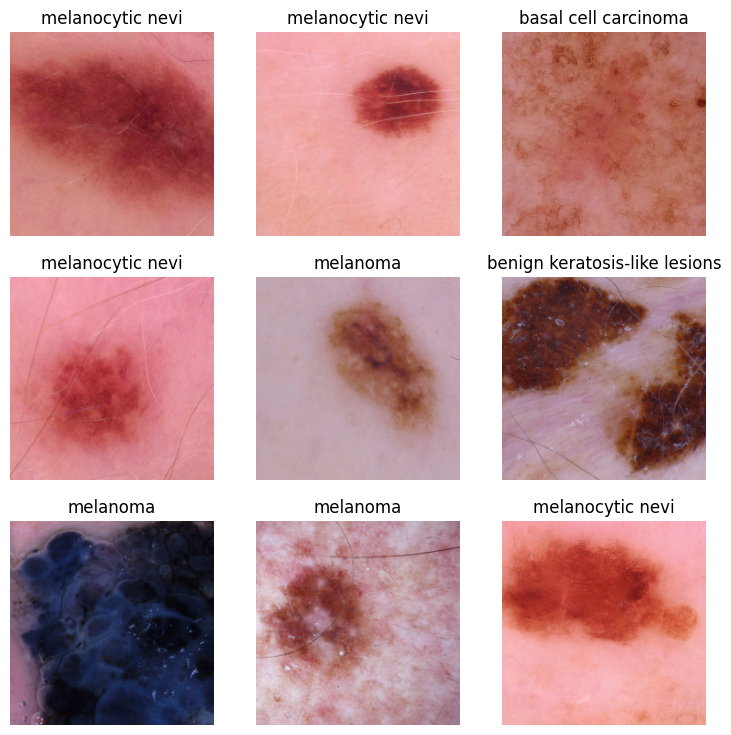

In [14]:
from fastai.vision.all import *
from pathlib import Path

img_path = [Path('HAM10000_images_part_1'), Path('HAM10000_images_part_2')]

def get_label_from_full_path(path):
    standardized_path = Path(path).as_posix()
    try:
        return img_to_class_dict[standardized_path]
    except KeyError:
        print(f"Label not found for file: {standardized_path}")
        return "Unknown"

skin_db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files_from_multiple_dirs, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=get_label_from_full_path, 
    item_tfms=Resize(450),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)]
)

dls = skin_db.dataloaders(img_path, path=Path('.'))

dls.show_batch()

In [17]:
learn = cnn_learner(dls, resnet18, metrics=accuracy, opt_func=ranger)
learn.fine_tune(epochs=50, freeze_epochs=3, base_lr=0.005, cbs=MixUp(0.5))

epoch,train_loss,valid_loss,accuracy,time
0,2.759231,1.527561,0.568053,01:38
1,1.788035,0.876018,0.723794,01:38
2,1.204565,0.703996,0.746090,01:39


Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg


epoch,train_loss,valid_loss,accuracy,time
0,0.983425,0.633688,0.768053,01:45
1,0.914131,0.595883,0.783694,01:46
2,0.860059,0.568203,0.792013,01:44
3,0.801764,0.545245,0.800333,01:44
4,0.769801,0.520034,0.807654,01:43
5,0.757016,0.503439,0.819634,01:44
6,0.722028,0.498928,0.824958,01:44
7,0.695876,0.476802,0.833611,01:44
8,0.669790,0.469175,0.831281,01:44
9,0.660865,0.523787,0.815641,01:43


Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_c.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_vf.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_r.jpg
Label not found for file: HAM10000_images_part_1/ISIC_0024306_hf.jpg
Label not found for file: HAM10000_images

In [19]:
learn.save('fast_api_model')

Path('models/fast_api_model.pth')